# Our first model

In [1]:
import pandas as pd 
import numpy as np

In [201]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Train-test-split for time series

In [4]:
df = pd.read_csv("../raw_data/data/merged_data_prescaling.csv")

In [11]:
df.head(2)

,bdi,cgdp,csteel,CIP
time,,,,
1995-01-23,1983.0,5.890383e+11,7.349355e+06,14.721669
1995-01-30,1959.0,5.923030e+11,7.317968e+06,15.351956


In [ ]:
df.set_index("time", inplace=True)

In [9]:
df.drop(columns="Unnamed: 0", inplace=True)

In [10]:
df.head(2)

,bdi,cgdp,csteel,CIP
time,,,,
1995-01-23,1983.0,5.890383e+11,7.349355e+06,14.721669
1995-01-30,1959.0,5.923030e+11,7.317968e+06,15.351956


## TimeseriesGenerator

In [15]:
folds = TimeSeriesSplit(n_splits=5)

train_data = []
test_data = list()

for i, (train_index, test_index) in enumerate(folds.split(df)):
    train_data.append(df.iloc[train_index])
    test_data.append(df.iloc[test_index])


In [19]:
train_data[2].head(2)

,bdi,cgdp,csteel,CIP
time,,,,
1995-01-23,1983.0,5.890383e+11,7.349355e+06,14.721669
1995-01-30,1959.0,5.923030e+11,7.317968e+06,15.351956


In [21]:
len(test_data[2])

231

In [20]:
test_data[2].head(2)

,bdi,cgdp,csteel,CIP
time,,,,
2008-07-07,9230.0,4.175011e+12,4.461429e+07,14.319898
2008-07-14,9012.0,4.194977e+12,4.413513e+07,13.857131


In [204]:
# X_train_list = []
# y_train_list = []
data_gen_list = []
scaler = MinMaxScaler()
for i in range(5):
    X = train_data[i]

    X_scaled = scaler.fit_transform(train_data[i])
    y = train_data[i]["bdi"]
    data_gen = TimeseriesGenerator(data=X_scaled, targets=y, length=12, batch_size=4)
#     X_train_list.append(X)
#     y_train_list.append(y_train_list)
    data_gen_list.append(data_gen)


In [205]:
#Creating validation_data:
data_gen_val_list = []

for i in range(5):
    X = test_data[i]
    X_test_scaled = scaler.fit_transform(train_data[i])
    y = test_data[i]["bdi"]
    data_gen_val = TimeseriesGenerator(data=X, targets=y, length=12, batch_size=4)
#     X_train_list.append(X)
#     y_train_list.append(y_train_list)
    data_gen_val_list.append(data_gen_val)


In [206]:
len(data_gen_val_list[4])

55

In [207]:
len(data_gen_list[4])

287

## Defining our model

In [209]:
from tensorflow.keras.optimizers import Adam

In [210]:
adam = Adam(learning_rate=0.01)

In [211]:
def init_model():
    
    model = Sequential()


    #LSTM layers
    model.add(layers.LSTM(128, activation="tanh", input_shape=(8,4), dropout=0.2, return_sequences=True, kernel_regularizer="l2"))
#     model.add(layers.LSTM(30, activation="tanh", return_sequences=False, kernel_regularizer="l2"))

    #Dense layers
    model.add(layers.Dense(30, activation="relu"))
    
    model.add(layers.Dense(1, activation="linear"))
    

    model.compile(loss="mse", optimizer=adam, metrics="mae")
    
    return model

In [212]:
model = init_model()

##  Training the model

In [213]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)

In [214]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# def scheduler():
#     if 

In [115]:
#lrs = LearningRateScheduler(schedule)

TypeError: __init__() missing 1 required positional argument: 'schedule'

In [216]:
history = model.fit(data_gen_list[4], epochs=100, validation_data=data_gen_val_list[4], shuffle=True, callbacks=es)

Epoch 1/100
287/287 [==============================] - 1s 4ms/step - loss: 4020894.7500 - mae: 1392.2697 - val_loss: 873557.3125 - val_mae: 671.4463
Epoch 2/100
287/287 [==============================] - 1s 4ms/step - loss: 4023556.0000 - mae: 1395.8466 - val_loss: 872497.1875 - val_mae: 665.8309
Epoch 3/100
287/287 [==============================] - 1s 4ms/step - loss: 4033698.2500 - mae: 1381.2866 - val_loss: 973235.8125 - val_mae: 805.8555
Epoch 4/100
287/287 [==============================] - 1s 4ms/step - loss: 3983145.5000 - mae: 1389.6549 - val_loss: 983046.0625 - val_mae: 814.4333
Epoch 5/100
287/287 [==============================] - 1s 4ms/step - loss: 4016761.2500 - mae: 1369.3799 - val_loss: 1231266.3750 - val_mae: 975.1678
Epoch 6/100
287/287 [==============================] - 1s 4ms/step - loss: 3877590.5000 - mae: 1341.0375 - val_loss: 928835.0625 - val_mae: 624.8113
Epoch 7/100
287/287 [==============================] - 1s 4ms/step - loss: 3776589.2500 - mae: 1233.7471 

In [171]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 8, 128)            68096     
                                                                 
 dense_30 (Dense)            (None, 8, 30)             3870      
                                                                 
 dense_31 (Dense)            (None, 8, 1)              31        
                                                                 
Total params: 71,997
Trainable params: 71,997
Non-trainable params: 0
_________________________________________________________________


In [109]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 36}

In [110]:
import matplotlib.pyplot as plt

In [111]:
def plot_history(history):
    
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE --- 
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- METRICS:MAE ---
    
    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
                        
    return ax

array([<AxesSubplot: title={'center': 'MSE'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot: title={'center': 'MAE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

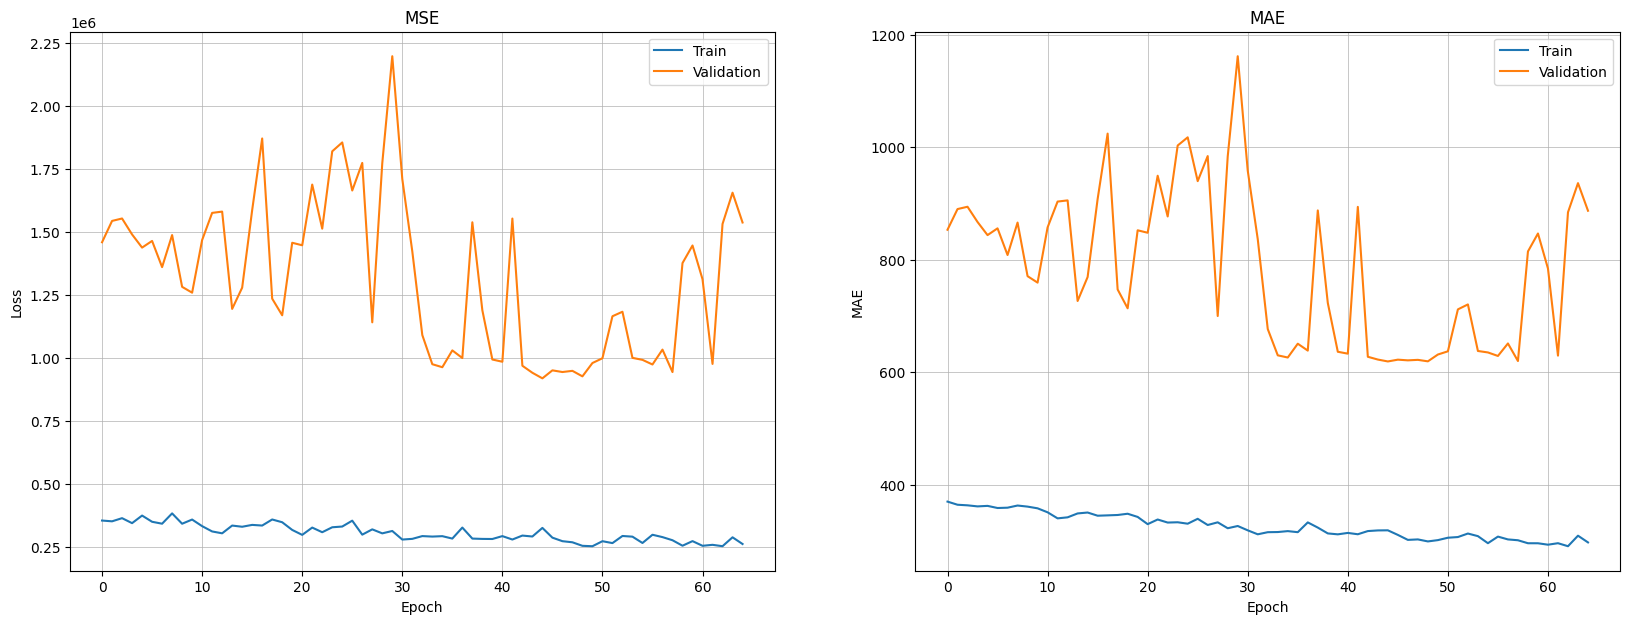

In [184]:
plot_history(history)